# Asymptotics


**Example** (LLN)

This script demonstrates LLN along with the underlying assumptions.
Consider three distributions: standard normal $N\left(0,1\right)$,
$t\left(2\right)$ (zero mean, infinite variance), and the Cauchy
distribution (no moments exist). We plot paths of the sample average
with $n=2^{1},2^{2},\ldots,2^{20}$. We will see that the sample averages
of $N\left(0,1\right)$ and $t\left(2\right)$ converge, but that of the
Cauchy distribution does not.

In [1]:
sample.mean = function( n, distribution ){
  # I am a function
  # I get sample mean for a given distribution
  if (distribution == "normal"){ y = rnorm( n ) } 
  else if (distribution == "t2") {y = rt(n, 2) }
  else if (distribution == "cauchy") {y = rcauchy(n) }
  return( mean(y) )
}

This function plots the sample mean over the path of geometrically increasing sample sizes.

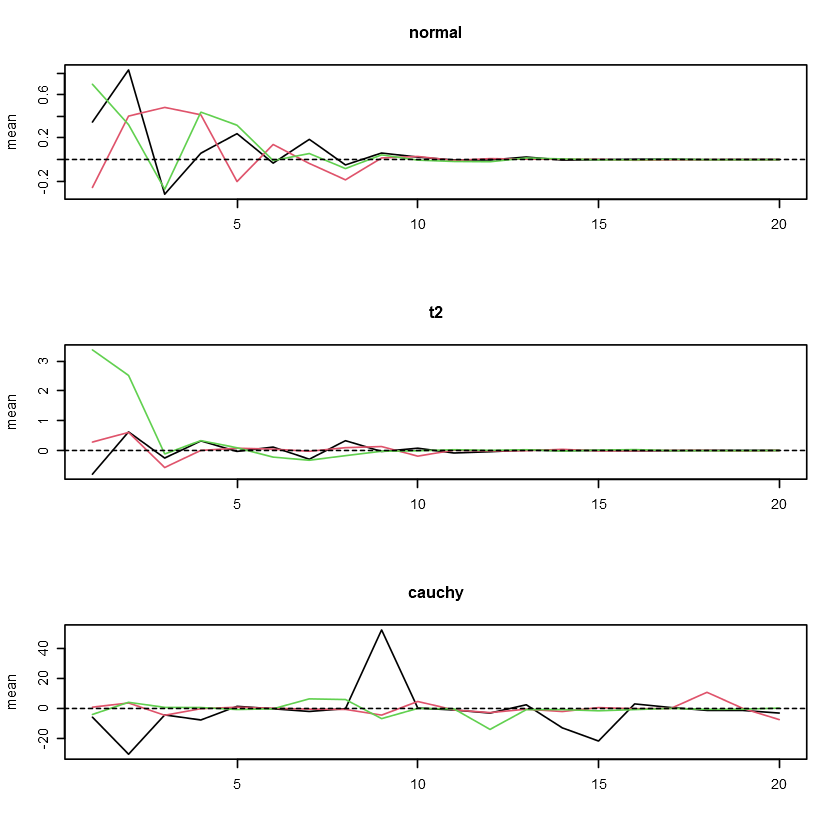

In [5]:

LLN.plot = function(distribution){
  # draw the sample mean graph

  ybar = matrix(0, length(NN), 3 )
  for (rr in 1:3){
    for ( ii in 1:length(NN)){
      n = NN[ii]; ybar[ii, rr] = sample.mean(n, distribution)
    }  
  }
  matplot(ybar, type = "l", ylab = "mean", xlab = "", 
       lwd = 1, lty = 1, main = distribution)
  abline(h = 0, lty = 2)
  return(ybar)
}

# calculation
NN = 2^(1:20); set.seed(2023-7-17); par(mfrow = c(3,1))
l1 = LLN.plot("normal"); l2 = LLN.plot("t2"); l3 = LLN.plot("cauchy")

**Example** (CLT)

$\chi^2(2)$ distribution with sample sizes $n=2$, $10$, and $100$.

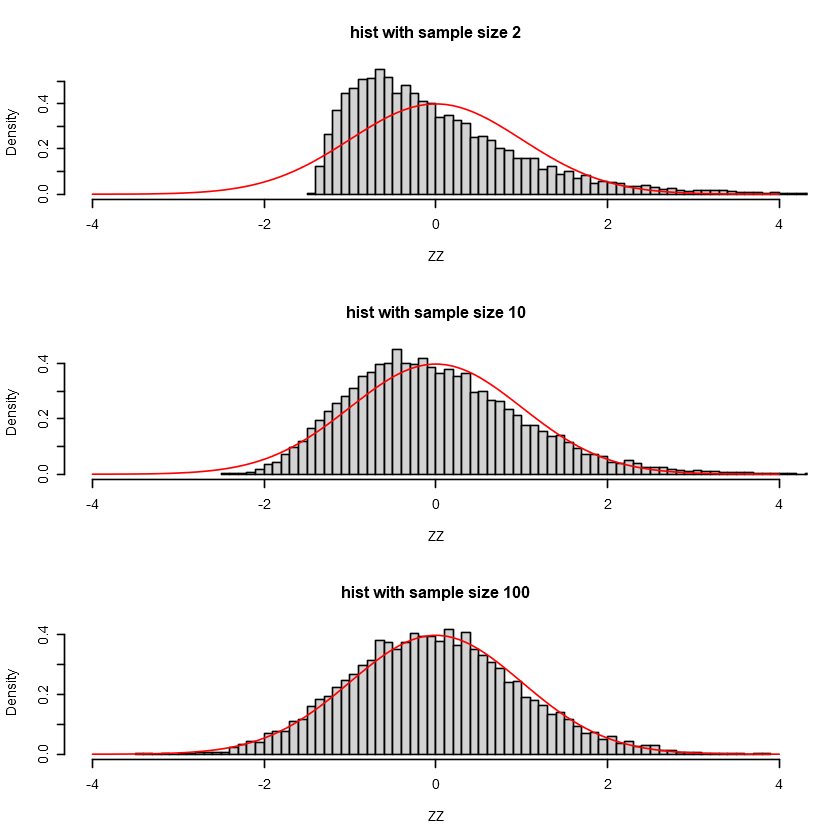

In [7]:
Z_fun = function(n, distribution){
  if (distribution == "normal"){
      z = sqrt(n) * mean(rnorm(n))
	} else if (distribution == "chisq2") {
      df = 2; 
      x = rchisq(n,2)
      z = sqrt(n) * ( mean(x) - df ) / sqrt(2*df)
      }
  return (z)
}

CLT_plot = function(n, distribution){
  Rep = 10000
  ZZ = rep(0, Rep)
  for (i in 1:Rep) {ZZ[i] = Z_fun(n, distribution)}

  xbase = seq(-4.0, 4.0, length.out = 100)
  hist( ZZ, breaks = 100, freq = FALSE, 
    xlim = c( min(xbase), max(xbase) ),
    main = paste0("hist with sample size ", n) )
  lines(x = xbase, y = dnorm(xbase), col = "red")
  return (ZZ)
}

par(mfrow = c(3,1))
phist = CLT_plot(2, "chisq2")
phist = CLT_plot(10, "chisq2")
phist = CLT_plot(100, "chisq2")